# Introduction

The case is that you are a Data Analyst at Skyline Financial Services (SFS), a leading digital bank that prides itself on using data-driven insights to drive business growth. Recently, the company has experienced a significant and unexpected dip in monthly revenue. An internal investigation has revealed a disturbing pattern of fraudulent activity slipping past existing detection systems.

Skyline Financial Services has tasked your team with investigating the root causes of this revenue loss. You have been provided with a dataset containing detailed user information, including demographics, spending behaviours, and transaction history. My job is to analyse this data to identify potential fraud and understand why certain users engage in fraudulent activities.


The aim is to develop a fraud detection model that accurately identifies fraudulent users while clearly explaining the factors driving these fraudulent behaviours. The findings will be crucial in developing new strategies to prevent future fraud and protect the company’s revenue. The targeted stakeholder for your presentation will be a senior risk management executive familiar with data analytics but not necessarily a technical expert.

Will the consideration of:
How will my model detect fraudulent users in real time?
What are the key indicators or patterns that suggest fraudulent behaviour?
How can my model be used not only to detect but also to prevent fraud in the future?



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43 AUD,14610.61 AUD,...,M006,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1
1,9645,3386,34,Male,Student,High School,Married,4,AU$ 54919.07,39169.49 AUD,...,M002,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1
2,1145,2971,25,Male,Unemployed,Master,Married,2,AU$ 74728.57,55873.76 AUD,...,M008,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0
3,15308,2925,25,Male,Professional,High School,Married,3,AU$ 55712.62,AED 89649.04,...,M001,Purchase,Darwin,iphone 15,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1
4,14967,2339,38,Male,Professional,High School,Single,4,53004.7 AUD,AED 43601.02,...,M001,Withdrawal,MLB,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,11284,3632,25,Male,Unemployed,High School,Single,3,64488.68 AUD,AU$ 21813.53,...,M007,Purchase,Canberra,Mobile,-37.020100,144.964600,rpalmer@outlook.com,False,110,0
10962,11964,3925,-18,Female,Professional,High School,Married,2,80403.31 AUD,AU$ 63429.08,...,M003,Purchase,Hobart,iphone 15,-37.020100,144.964600,rcruz@yahoo.com,False,91,1
10963,5390,4811,22,Male,Unemployed,High School,Widowed,3,AU$ 29048.42,18806.31 AUD,...,M002,Purchase,canberra,mob,-31.840233,145.612793,dawnmendoza@yahoo.com,True,84,0
10964,860,1110,29,Female,Student,High School,Divorced,4,28654.66 AUD,AU$ 9748.53,...,M004,Purchase,Canberra,Mobile,-37.020100,144.964600,miranda86@disposable.com,False,62,1


In [3]:
test = pd.read_csv('test.csv')
test

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,TransactionAmount,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure
0,11854,963,35,man,Student,Bachelor,Single,4,53733.41 AUD,AU$ 29296.02,...,AU$ 225.64,M005,Payment,Darwin,Desktop,-37.020100,144.964600,chapmangabriel@outlook.com,True,39
1,2647,1693,23,Male,Professional,Master,Single,2,54856.77 AUD,34628.31 AUD,...,AU$ 658.1,M003,Purchase,Darwin,Desktop,-37.020100,144.964600,sjones@gmail.com,True,65
2,5945,4383,44,Male,Student,Bachelor,Single,2,59011.72 AUD,33312.46 AUD,...,AU$ 133.59,M004,Purchase,Adelaide,mob,-30.000233,136.209152,woodmaria@yahoo.com,False,95
3,6798,1350,40,Male,Student,High School,Married,3,AU$ 128795.4,67049.0 AUD,...,AU$ 6.74,M008,Withdrawal,Canberra,Mobile,-37.020100,144.964600,rthornton@gmail.com,False,85
4,12985,4145,18,Male,Professional,Bachelor,Married,3,AU$ 44506.03,22856.31 AUD,...,15.67 AUD,M008,Transfer,Perth,Tablet,-20.917574,142.702789,daniel61@outlook.com,True,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7307,2636,498,40,Female,Student,High School,Married,4,46099.15 AUD,AU$ 23638.96,...,370.89 AUD,M007,Withdrawal,Perth,Desktop,-37.020100,144.964600,theresachavez@gmail.com,False,87
7308,14557,4707,52,Male,Unemployed,Master,Married,0,148540.21 AUD,76153.21 AUD,...,AU$ 48.35,M008,Purchase,Brisbane,mob,-31.840233,145.612793,bsmith@yahoo.com,False,39
7309,296,1426,42,Male,Student,Bachelor,Single,3,AU$ 62223.32,AU$ 25581.85,...,AU$ 110.23,M006,Transfer,Hobart,Mobile,-37.020100,144.964600,hensonernest@gmail.com,True,74
7310,1864,4605,39,Female,Student,PhD,Married,0,AU$ 119426.16,AU$ 85940.02,...,AU$ 202.37,M008,Purchase,Darwin,Mobile,-31.840233,145.612793,kschultz@gmail.com,True,18


In [4]:
data = pd.concat([train, test], ignore_index = True)
data

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43 AUD,14610.61 AUD,...,M006,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1.0
1,9645,3386,34,Male,Student,High School,Married,4,AU$ 54919.07,39169.49 AUD,...,M002,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1.0
2,1145,2971,25,Male,Unemployed,Master,Married,2,AU$ 74728.57,55873.76 AUD,...,M008,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0.0
3,15308,2925,25,Male,Professional,High School,Married,3,AU$ 55712.62,AED 89649.04,...,M001,Purchase,Darwin,iphone 15,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1.0
4,14967,2339,38,Male,Professional,High School,Single,4,53004.7 AUD,AED 43601.02,...,M001,Withdrawal,MLB,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,2636,498,40,Female,Student,High School,Married,4,46099.15 AUD,AU$ 23638.96,...,M007,Withdrawal,Perth,Desktop,-37.020100,144.964600,theresachavez@gmail.com,False,87,NaN
18274,14557,4707,52,Male,Unemployed,Master,Married,0,148540.21 AUD,76153.21 AUD,...,M008,Purchase,Brisbane,mob,-31.840233,145.612793,bsmith@yahoo.com,False,39,NaN
18275,296,1426,42,Male,Student,Bachelor,Single,3,AU$ 62223.32,AU$ 25581.85,...,M006,Transfer,Hobart,Mobile,-37.020100,144.964600,hensonernest@gmail.com,True,74,NaN
18276,1864,4605,39,Female,Student,PhD,Married,0,AU$ 119426.16,AU$ 85940.02,...,M008,Purchase,Darwin,Mobile,-31.840233,145.612793,kschultz@gmail.com,True,18,NaN


In [5]:
data.head()

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43 AUD,14610.61 AUD,...,M006,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1.0
1,9645,3386,34,Male,Student,High School,Married,4,AU$ 54919.07,39169.49 AUD,...,M002,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1.0
2,1145,2971,25,Male,Unemployed,Master,Married,2,AU$ 74728.57,55873.76 AUD,...,M008,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0.0
3,15308,2925,25,Male,Professional,High School,Married,3,AU$ 55712.62,AED 89649.04,...,M001,Purchase,Darwin,iphone 15,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1.0
4,14967,2339,38,Male,Professional,High School,Single,4,53004.7 AUD,AED 43601.02,...,M001,Withdrawal,MLB,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0.0


In [6]:
data.dtypes

TransactionNumber        int64
UserID                   int64
Age                      int64
Gender                  object
Occupation              object
EducationLevel          object
MaritalStatus           object
NumDependents            int64
Income                  object
Expenditure             object
GiftsTransaction        object
TransactionDate         object
TransactionTime         object
TransactionAmount       object
MerchantID              object
TransactionType         object
TransactionLocation     object
DeviceType              object
Latitude               float64
Longitude              float64
EmailDomain             object
Terrorism                 bool
UserTenure               int64
IsFraud                float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionNumber    18278 non-null  int64  
 1   UserID               18278 non-null  int64  
 2   Age                  18278 non-null  int64  
 3   Gender               18278 non-null  object 
 4   Occupation           18278 non-null  object 
 5   EducationLevel       18278 non-null  object 
 6   MaritalStatus        18278 non-null  object 
 7   NumDependents        18278 non-null  int64  
 8   Income               18278 non-null  object 
 9   Expenditure          18278 non-null  object 
 10  GiftsTransaction     18278 non-null  object 
 11  TransactionDate      18278 non-null  object 
 12  TransactionTime      18278 non-null  object 
 13  TransactionAmount    18278 non-null  object 
 14  MerchantID           18278 non-null  object 
 15  TransactionType      18278 non-null 

In [8]:
data.describe()

,TransactionNumber,UserID,Age,NumDependents,Latitude,Longitude,UserTenure,IsFraud
count,18278.000000,18278.000000,18278.000000,18278.000000,18204.000000,18204.000000,18278.000000,10966.000000
mean,9138.500000,2494.824215,2796.995185,2.002681,-30.389930,141.199409,60.514608,0.364308
std,5276.548446,1430.947492,9751.336112,1.406277,6.873901,11.176977,34.326445,0.481257
min,0.000000,1.000000,-68.000000,0.000000,-41.640079,-122.176240,1.000000,0.000000
25%,4569.250000,1270.000000,26.000000,1.000000,-37.020100,142.702789,31.000000,0.000000
50%,9138.500000,2484.000000,34.000000,2.000000,-31.840233,144.964600,61.000000,0.000000
75%,13707.750000,3736.000000,43.000000,3.000000,-25.042261,145.612793,90.000000,1.000000
max,18277.000000,5000.000000,67000.000000,4.000000,57.851580,149.012375,119.000000,1.000000


## Cleaning data

In [9]:
# Checking null values:
data.isnull().sum()

TransactionNumber         0
UserID                    0
Age                       0
Gender                    0
Occupation                0
EducationLevel            0
MaritalStatus             0
NumDependents             0
Income                    0
Expenditure               0
GiftsTransaction          0
TransactionDate           0
TransactionTime           0
TransactionAmount         0
MerchantID                0
TransactionType           0
TransactionLocation       0
DeviceType                0
Latitude                 74
Longitude                74
EmailDomain               0
Terrorism                 0
UserTenure                0
IsFraud                7312
dtype: int64

In [10]:
data['Latitude'].fillna(data['Latitude'].mean(axis = 0),inplace = True)
data['Longitude'].fillna(data['Longitude'].mean(axis = 0),inplace = True)

In [11]:
data.isnull().sum()

TransactionNumber         0
UserID                    0
Age                       0
Gender                    0
Occupation                0
EducationLevel            0
MaritalStatus             0
NumDependents             0
Income                    0
Expenditure               0
GiftsTransaction          0
TransactionDate           0
TransactionTime           0
TransactionAmount         0
MerchantID                0
TransactionType           0
TransactionLocation       0
DeviceType                0
Latitude                  0
Longitude                 0
EmailDomain               0
Terrorism                 0
UserTenure                0
IsFraud                7312
dtype: int64

In [12]:
data['Income'] = data['Income'].replace({'AU\$': '', 'AUD': ''}, regex=True).astype(float)

In [13]:
aed = data['Expenditure'].str.contains('AED', na=False)  

data['Expenditure'] = data['Expenditure'].replace({'AU\$': '', 'AUD': '', 'AED': ''}, regex=True).astype(float)

rate = 0.406

data.loc[aed, 'Expenditure'] = data.loc[aed, 'Expenditure'] * rate


In [14]:
aed_tran = data['TransactionAmount'].str.contains('AED', na=False)  

data['TransactionAmount'] = data['TransactionAmount'].replace({'AU\$': '', 'AUD': '', 'AED': ''}, regex=True).astype(float)

rate = 0.406

data.loc[aed_tran, 'TransactionAmount'] = data.loc[aed_tran, 'TransactionAmount'] * rate

In [15]:
data['TransactionAmount']

0        258.14000
1         34.94000
2        323.82000
3         13.19094
4        463.14450
           ...    
18273    370.89000
18274     48.35000
18275    110.23000
18276    202.37000
18277     39.83000
Name: TransactionAmount, Length: 18278, dtype: float64

In [16]:
GBP_gift = data['GiftsTransaction'].str.contains('GBP|£', na=False) 

data['GiftsTransaction'] = data['GiftsTransaction'].replace({'AU\$': '', 'AUD': '',  '£': '', 'GBP':''}, regex=True).astype(float)

rate = 1.957

data.loc[GBP_gift, 'GiftsTransaction'] = data.loc[GBP_gift, 'GiftsTransaction'] * rate

In [17]:
data['GiftsTransaction']

0         2054.86957
1         9725.72247
2         2250.25645
3         4335.70000
4         4763.48000
            ...     
18273     6422.44346
18274     4084.33728
18275     5238.65416
18276     9248.37103
18277    29008.72842
Name: GiftsTransaction, Length: 18278, dtype: float64

In [18]:
# Cleaning Gender:
gender_mapping = {
    'Female': 'Female',
    'fem': 'Female',
    'she': 'Female',
    'woman': 'Female',
    'Male': 'Male',
    'he': 'Male',
    'man': 'Male',
    'isnotfemale': 'Others',
    'isnotmale': 'Others' 
}

data['Gender'] = data['Gender'].map(gender_mapping)



In [19]:
# Cleaning DeviceType: 
device_mapping = {
    'Mobile': 'Mobile',
    'iphone 15': 'Mobile',
    'android': 'Mobile',
    'smartphone': 'Mobile',
    'mob': 'Mobile',
    'galaxys7': 'Mobile',
    'Tablet': 'Tablet',
    'Desktop': 'Desktop'
}

data['DeviceType'] = data['DeviceType'].map(device_mapping)



In [20]:
# Cleaning TransactionLocation:
city_mapping = {
    'Melbourne':'Melbourne','MLB': 'Melbourne', 'Mel': 'Melbourne', 'Melb': 'Melbourne', 'melbourne': 'Melbourne', 'Melburn': 'Melbourne',
    'Sydney':'Sydney','SYD': 'Sydney', 'Syd': 'Sydney', 'sydney': 'Sydney',
    'Canberra':'Canberra','CBR': 'Canberra', 'Cbr': 'Canberra', 'canberra': 'Canberra',
    'Brisbane':'Brisbane','BNE': 'Brisbane', 'Bne': 'Brisbane', 'brisbane': 'Brisbane',
    'Perth':'Perth','PTH': 'Perth', 'Pth': 'Perth', 'perth': 'Perth',
    'Darwin':'Darwin','DRW': 'Darwin', 'Drw': 'Darwin', 'darwin': 'Darwin',
    'Hobart':'Hobart','HBT': 'Hobart', 'Hbt': 'Hobart', 'hobart': 'Hobart',
    'Adelaide':'Adelaide','Adl': 'Adelaide', 'adl': 'Adelaide', 'Adelaide City': 'Adelaide'
}

data['TransactionLocation'] = data['TransactionLocation'].map(city_mapping)

In [21]:
data['TransactionLocation']

0         Adelaide
1         Canberra
2         Brisbane
3           Darwin
4        Melbourne
           ...    
18273        Perth
18274     Brisbane
18275       Hobart
18276       Darwin
18277    Melbourne
Name: TransactionLocation, Length: 18278, dtype: object

In [22]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

data['listed_date_day'] = data['TransactionDate'].dt.day.astype('int64')
data['listed_date_month'] = data['TransactionDate'].dt.month.astype('int64')


In [23]:
data = data.drop('TransactionDate', axis=1)

In [24]:
data['TransactionTime']

0           12:25:57
1           18:27:24
2           17:16:56
3           00/34/17
4        06:40:08 PM
            ...     
18273       15:04:47
18274       05:40:15
18275       23:59:59
18276       07:17:03
18277       19:13:15
Name: TransactionTime, Length: 18278, dtype: object

In [25]:
# Cleaning TransactionTime:
from datetime import datetime

def convert24(TransactionTime):
    if 'AM' in TransactionTime or 'PM' in TransactionTime:
        t = datetime.strptime(TransactionTime, '%I:%M:%S %p')
        return t.strftime('%H:%M:%S')
    else:
        return TransactionTime
data['Income'] = data['Income'].replace({'AU\$': '', 'AUD': ''}, regex=True).astype(float)

In [26]:
data['TransactionTime'] = data['TransactionTime'].apply(convert24)

In [27]:
data['TransactionTime'] = data['TransactionTime'].str.replace('/', ':')

In [28]:
data['TransactionTime'] = pd.to_datetime(data['TransactionTime'], format='%H:%M:%S', errors='coerce')

data['listed_time_hour'] = data['TransactionTime'].dt.hour.astype('int64')
data['listed_time_minute'] = data['TransactionTime'].dt.minute.astype('int64')
data['listed_time_second'] = data['TransactionTime'].dt.second.astype('int64')

In [29]:
data = data.drop('TransactionTime', axis=1)
data = data.drop('EmailDomain', axis=1)

In [30]:
# Cleaning the Age column:
def clean_age(age):
    if age > 1000: 
        return age // 1000
    elif age < 0: 
        return abs(age)
    return age  


data['Age'] = data['Age'].apply(clean_age)


In [31]:
data

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,Latitude,Longitude,Terrorism,UserTenure,IsFraud,listed_date_day,listed_date_month,listed_time_hour,listed_time_minute,listed_time_second
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43,14610.61000,...,-31.840233,145.612793,False,113,1.0,12,3,12,25,57
1,9645,3386,34,Male,Student,High School,Married,4,54919.07,39169.49000,...,-37.020100,144.964600,False,104,1.0,5,3,18,27,24
2,1145,2971,25,Male,Unemployed,Master,Married,2,74728.57,55873.76000,...,-31.840233,145.612793,False,105,0.0,10,11,17,16,56
3,15308,2925,25,Male,Professional,High School,Married,3,55712.62,36397.51024,...,-37.020100,144.964600,False,70,1.0,7,10,0,34,17
4,14967,2339,38,Male,Professional,High School,Single,4,53004.70,17702.01412,...,-37.020100,144.964600,False,27,0.0,22,9,18,40,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,2636,498,40,Female,Student,High School,Married,4,46099.15,23638.96000,...,-37.020100,144.964600,False,87,NaN,17,12,15,4,47
18274,14557,4707,52,Male,Unemployed,Master,Married,0,148540.21,76153.21000,...,-31.840233,145.612793,False,39,NaN,10,7,5,40,15
18275,296,1426,42,Male,Student,Bachelor,Single,3,62223.32,25581.85000,...,-37.020100,144.964600,True,74,NaN,1,7,23,59,59
18276,1864,4605,39,Female,Student,PhD,Married,0,119426.16,85940.02000,...,-31.840233,145.612793,True,18,NaN,10,12,7,17,3


# Comment
- Inconsistent Currency Representation: We identified inconsistencies in numerical variables such as Expenditure, TransactionAmount, and GiftsTransaction, which did not consistently represent the same currency. To address this, we converted all values to a common currency, Australian Dollars (AUD), to ensure uniformity and accuracy in the analysis.

- Inconsistent Categorical Variables: Categorical variables like Gender, Device, and City exhibited variations in naming conventions (e.g., different abbreviations, capitalization, and spellings). We standardized these categories to ensure consistency and reduce variability. This transformation allows for clearer grouping and more accurate analysis of trends.

- Irregularities in Age Variable: The Age variable contained implausible values, including negative ages and values exceeding 1,000, which are clearly erroneous. We flagged and corrected these irregularities to maintain the integrity of the data and to ensure that only valid age ranges are considered in our analysis




## EDA

In [32]:
train = data.loc[:10965]
train

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,Latitude,Longitude,Terrorism,UserTenure,IsFraud,listed_date_day,listed_date_month,listed_time_hour,listed_time_minute,listed_time_second
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43,14610.61000,...,-31.840233,145.612793,False,113,1.0,12,3,12,25,57
1,9645,3386,34,Male,Student,High School,Married,4,54919.07,39169.49000,...,-37.020100,144.964600,False,104,1.0,5,3,18,27,24
2,1145,2971,25,Male,Unemployed,Master,Married,2,74728.57,55873.76000,...,-31.840233,145.612793,False,105,0.0,10,11,17,16,56
3,15308,2925,25,Male,Professional,High School,Married,3,55712.62,36397.51024,...,-37.020100,144.964600,False,70,1.0,7,10,0,34,17
4,14967,2339,38,Male,Professional,High School,Single,4,53004.70,17702.01412,...,-37.020100,144.964600,False,27,0.0,22,9,18,40,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,11284,3632,25,Male,Unemployed,High School,Single,3,64488.68,21813.53000,...,-37.020100,144.964600,False,110,0.0,4,6,23,2,18
10962,11964,3925,18,Female,Professional,High School,Married,2,80403.31,63429.08000,...,-37.020100,144.964600,False,91,1.0,24,5,2,34,24
10963,5390,4811,22,Male,Unemployed,High School,Widowed,3,29048.42,18806.31000,...,-31.840233,145.612793,True,84,0.0,26,12,9,42,49
10964,860,1110,29,Female,Student,High School,Divorced,4,28654.66,9748.53000,...,-37.020100,144.964600,False,62,1.0,16,7,5,24,17


In [33]:
test = data.loc[10966:]
test

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,Latitude,Longitude,Terrorism,UserTenure,IsFraud,listed_date_day,listed_date_month,listed_time_hour,listed_time_minute,listed_time_second
10966,11854,963,35,Male,Student,Bachelor,Single,4,53733.41,29296.02,...,-37.020100,144.964600,True,39,NaN,8,9,23,59,59
10967,2647,1693,23,Male,Professional,Master,Single,2,54856.77,34628.31,...,-37.020100,144.964600,True,65,NaN,5,8,8,23,18
10968,5945,4383,44,Male,Student,Bachelor,Single,2,59011.72,33312.46,...,-30.000233,136.209152,False,95,NaN,5,3,8,15,15
10969,6798,1350,40,Male,Student,High School,Married,3,128795.40,67049.00,...,-37.020100,144.964600,False,85,NaN,23,5,17,51,1
10970,12985,4145,18,Male,Professional,Bachelor,Married,3,44506.03,22856.31,...,-20.917574,142.702789,True,102,NaN,4,11,19,32,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,2636,498,40,Female,Student,High School,Married,4,46099.15,23638.96,...,-37.020100,144.964600,False,87,NaN,17,12,15,4,47
18274,14557,4707,52,Male,Unemployed,Master,Married,0,148540.21,76153.21,...,-31.840233,145.612793,False,39,NaN,10,7,5,40,15
18275,296,1426,42,Male,Student,Bachelor,Single,3,62223.32,25581.85,...,-37.020100,144.964600,True,74,NaN,1,7,23,59,59
18276,1864,4605,39,Female,Student,PhD,Married,0,119426.16,85940.02,...,-31.840233,145.612793,True,18,NaN,10,12,7,17,3


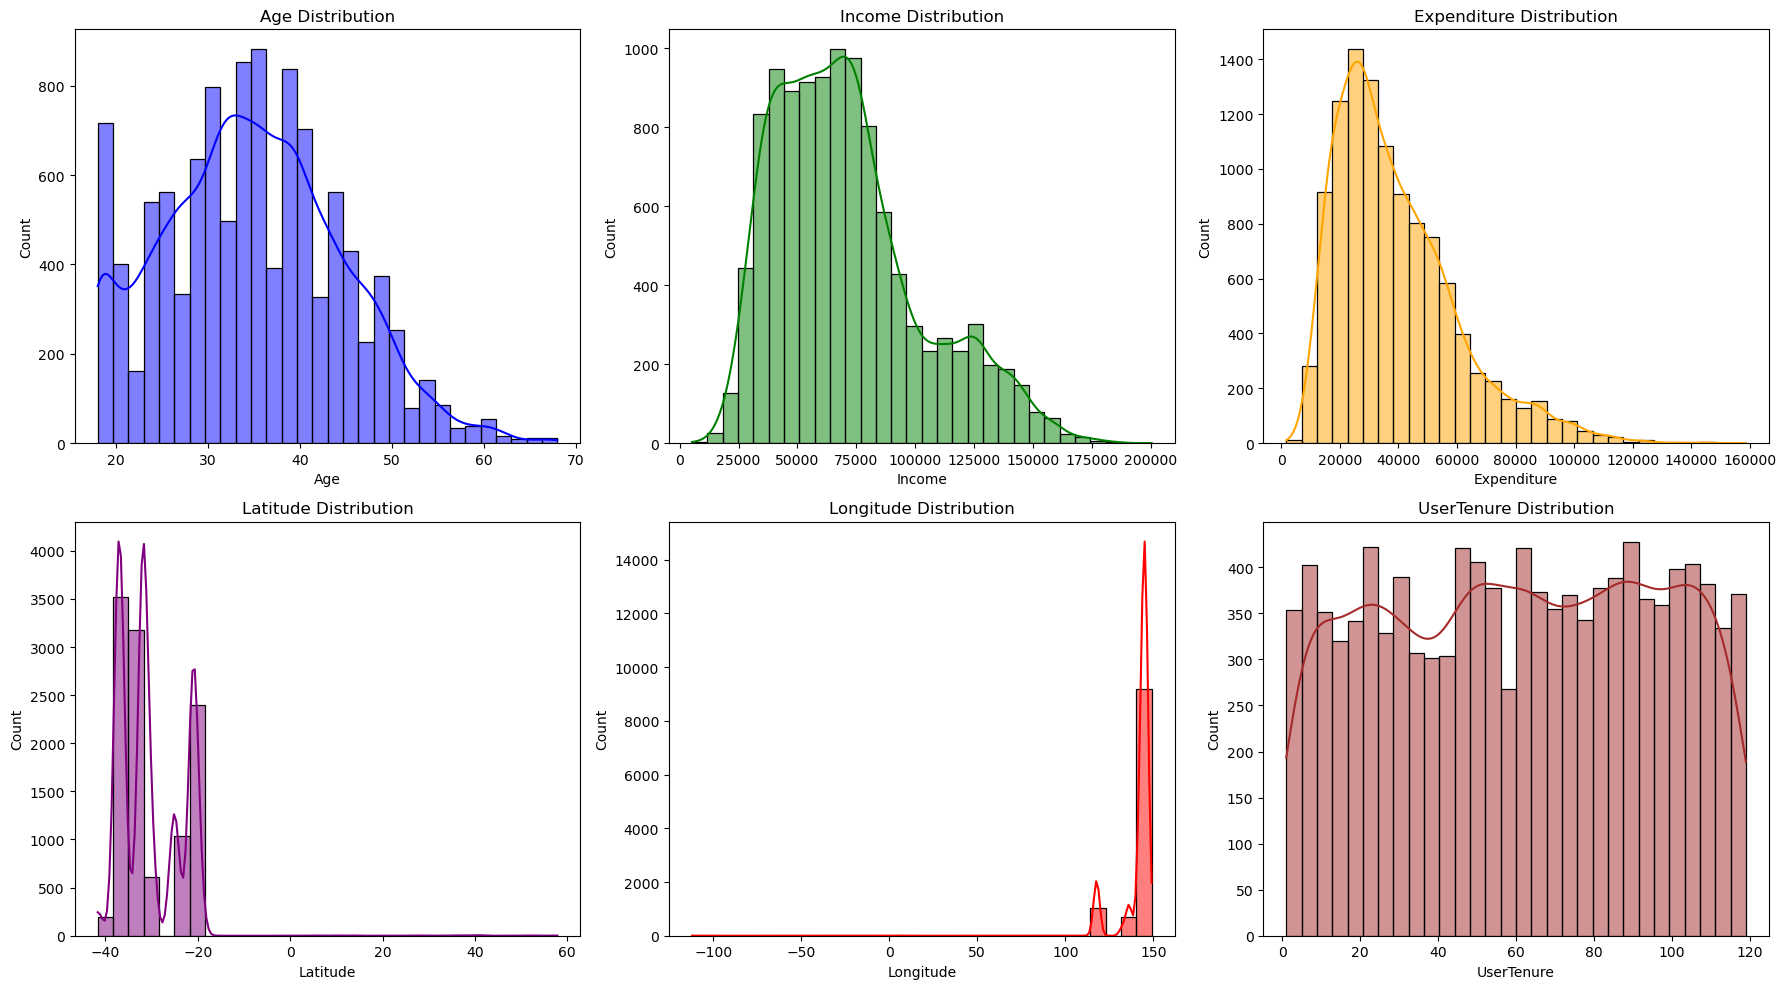

In [62]:
import seaborn as sns

plt.figure(figsize=(18, 10))

# Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(train['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')

# Income Distribution
plt.subplot(2, 3, 2)
sns.histplot(train['Income'], kde=True, bins=30, color='green')
plt.title('Income Distribution')

# Expenditure Distribution
plt.subplot(2, 3, 3)
sns.histplot(train['Expenditure'], kde=True, bins=30, color='orange')
plt.title('Expenditure Distribution')

# Latitude Distribution
plt.subplot(2, 3, 4)
sns.histplot(train['Latitude'], kde=True, bins=30, color='purple')
plt.title('Latitude Distribution')

# Longitude Distribution
plt.subplot(2, 3, 5)
sns.histplot(train['Longitude'], kde=True, bins=30, color='red')
plt.title('Longitude Distribution')

# UserTenure Distribution
plt.subplot(2, 3, 6)
sns.histplot(train['UserTenure'], kde=True, bins=30, color='brown')
plt.title('UserTenure Distribution')

plt.tight_layout()
plt.show()

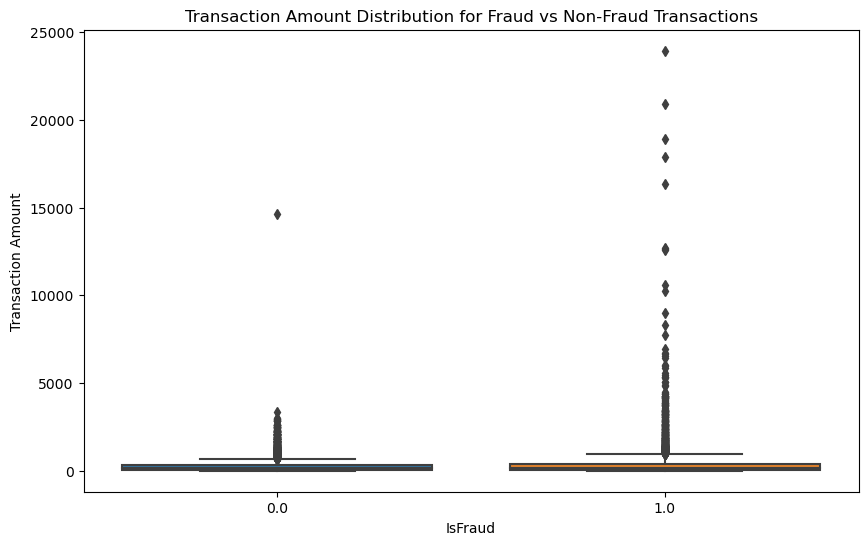

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of TransactionAmount by IsFraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='TransactionAmount', data=data)
plt.title('Transaction Amount Distribution for Fraud vs Non-Fraud Transactions')
plt.xlabel('IsFraud')
plt.ylabel('Transaction Amount')
plt.show()


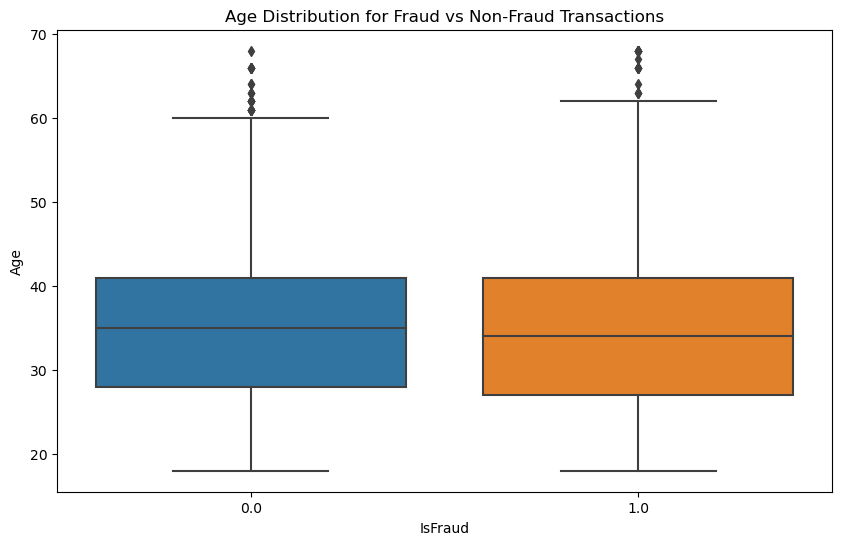

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of Age by IsFraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='Age', data=data)
plt.title('Age Distribution for Fraud vs Non-Fraud Transactions')
plt.xlabel('IsFraud')
plt.ylabel('Age')
plt.show()


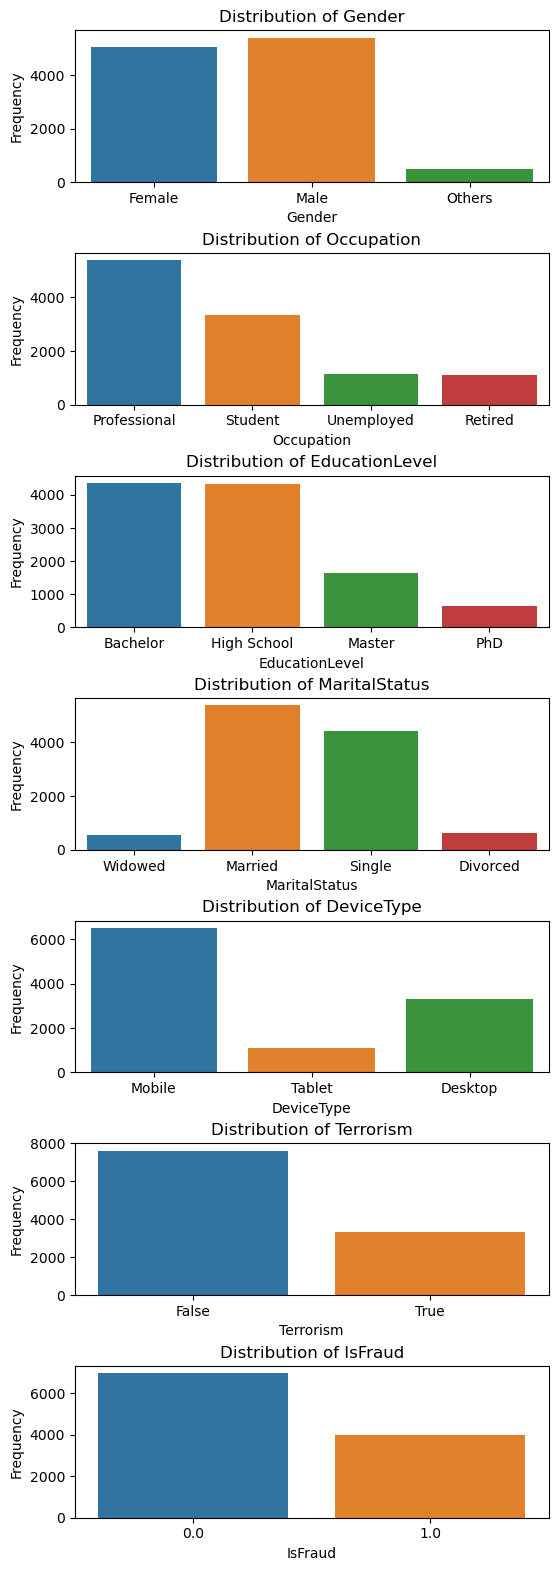

In [36]:
categorical_columns = ['Gender','Occupation','EducationLevel','MaritalStatus','DeviceType','Terrorism','IsFraud']
fig, axes = plt.subplots(7, 1, figsize=(6, 16))
fig.tight_layout(pad=3.0)
for i, column in enumerate(categorical_columns):
    sns.countplot(data=train, x=column,ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

Text(0.5, 1.0, 'Box Plot of Numerical Variables')

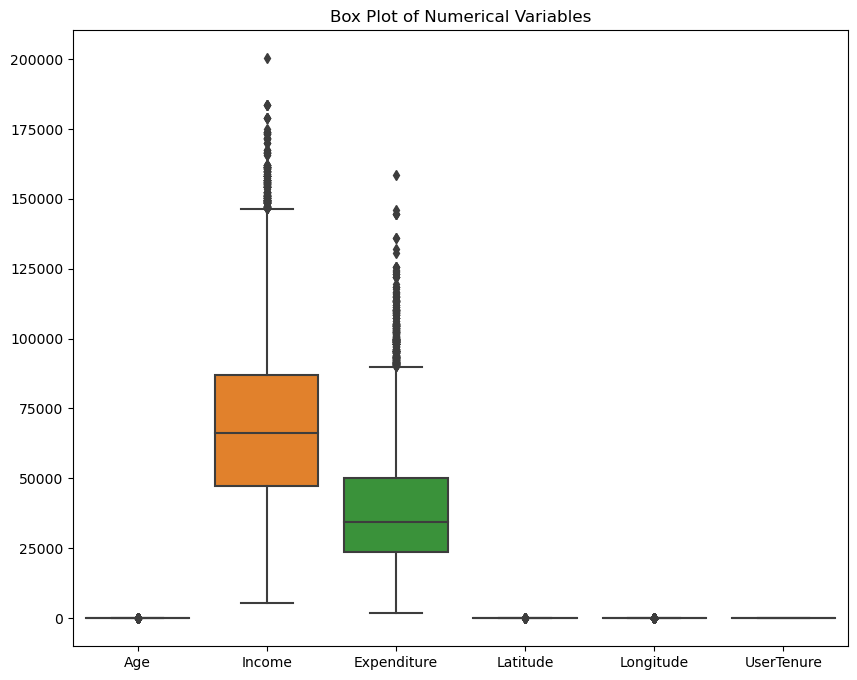

In [37]:
numeric_columns = ['Age', 'Income', 'Expenditure', 'Latitude', 'Longitude','UserTenure']
plt.figure(figsize=(10,8))
sns.boxplot(train[numeric_columns])
plt.title('Box Plot of Numerical Variables')

In [38]:
correlation = train.select_dtypes(include=['float64', 'int64']).corr()
correlation

,TransactionNumber,UserID,Age,NumDependents,Income,Expenditure,GiftsTransaction,TransactionAmount,Latitude,Longitude,UserTenure,IsFraud,listed_date_day,listed_date_month,listed_time_hour,listed_time_minute,listed_time_second
TransactionNumber,1.000000,-0.015610,0.004734,-0.005533,0.007088,0.014809,0.023128,0.015641,0.007142,-0.016264,0.006915,0.026396,0.002699,0.002409,-0.014796,-0.008528,0.001449
UserID,-0.015610,1.000000,0.027236,-0.005187,-0.013013,-0.030873,-0.030349,-0.016176,-0.004960,0.010344,0.007339,0.016719,0.008954,-0.004418,-0.007638,-0.005033,-0.008228
Age,0.004734,0.027236,1.000000,-0.007555,-0.002261,-0.007901,0.003128,0.016915,0.010947,-0.012679,0.015264,-0.005097,-0.037082,0.001013,0.019817,0.026320,0.000635
NumDependents,-0.005533,-0.005187,-0.007555,1.000000,-0.011646,-0.010443,0.004415,-0.003254,0.018738,-0.012945,-0.015925,-0.027305,0.019771,0.018265,0.043497,-0.001018,0.003527
Income,0.007088,-0.013013,-0.002261,-0.011646,1.000000,0.833589,0.431097,0.007417,0.032752,0.000709,-0.011071,0.012592,-0.001172,-0.025803,-0.015682,-0.012072,-0.009209
Expenditure,0.014809,-0.030873,-0.007901,-0.010443,0.833589,1.000000,0.355824,0.005916,0.033512,-0.004394,-0.012603,0.000202,-0.007186,-0.025850,-0.014459,-0.005268,-0.000777
GiftsTransaction,0.023128,-0.030349,0.003128,0.004415,0.431097,0.355824,1.000000,-0.005288,0.003121,-0.002957,0.026659,0.006182,0.024555,-0.006461,-0.004286,-0.011468,0.004119
TransactionAmount,0.015641,-0.016176,0.016915,-0.003254,0.007417,0.005916,-0.005288,1.000000,0.005525,-0.013145,0.004703,0.115039,-0.000795,-0.051398,-0.043275,-0.007621,0.004399
Latitude,0.007142,-0.004960,0.010947,0.018738,0.032752,0.033512,0.003121,0.005525,1.000000,-0.497894,-0.023814,0.005261,-0.001392,0.010654,-0.013139,-0.031698,-0.014134
Longitude,-0.016264,0.010344,-0.012679,-0.012945,0.000709,-0.004394,-0.002957,-0.013145,-0.497894,1.000000,0.026297,0.003647,0.003368,0.002119,0.003207,0.005056,-0.009056


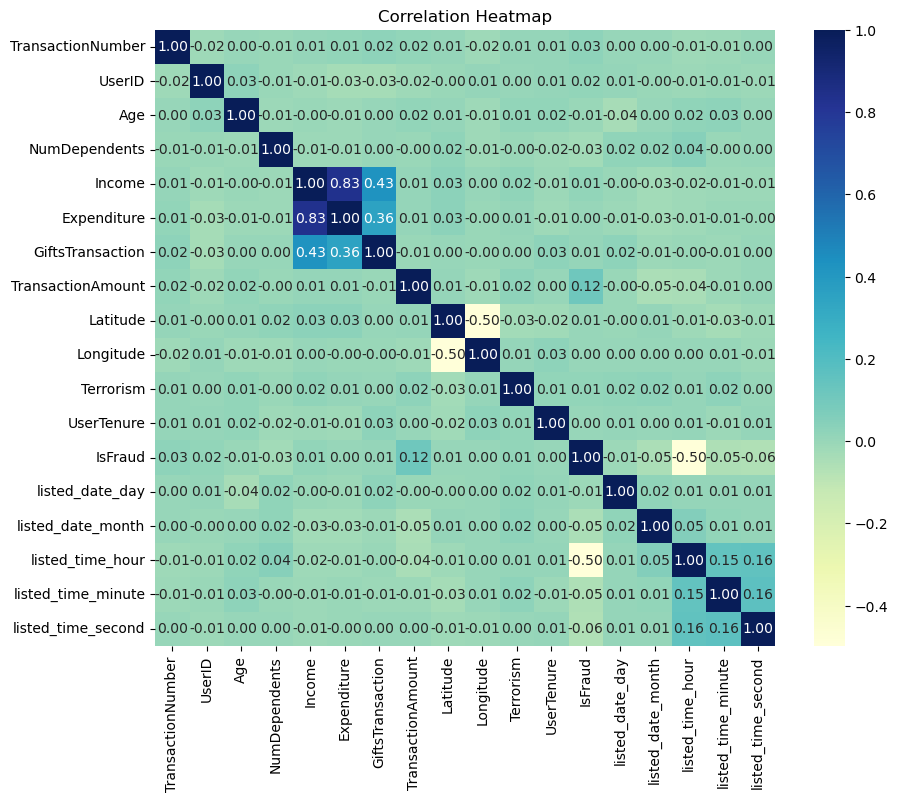

In [39]:
# Compute the correlation matrix
corr_matrix= train.corr(numeric_only= True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [40]:
# Correlations of 'target' with other features:
correlation['IsFraud']

TransactionNumber     0.026396
UserID                0.016719
Age                  -0.005097
NumDependents        -0.027305
Income                0.012592
Expenditure           0.000202
GiftsTransaction      0.006182
TransactionAmount     0.115039
Latitude              0.005261
Longitude             0.003647
UserTenure            0.004936
IsFraud               1.000000
listed_date_day      -0.008366
listed_date_month    -0.047666
listed_time_hour     -0.495604
listed_time_minute   -0.054500
listed_time_second   -0.062673
Name: IsFraud, dtype: float64

## Encode all categorical variables appropriately 

In [41]:
# Encoding EducationLevel:
education_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}

data['EducationLevel'] = data['EducationLevel'].map(education_mapping)
data

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,Latitude,Longitude,Terrorism,UserTenure,IsFraud,listed_date_day,listed_date_month,listed_time_hour,listed_time_minute,listed_time_second
0,8765,70,37,Female,Professional,2,Widowed,3,28884.43,14610.61000,...,-31.840233,145.612793,False,113,1.0,12,3,12,25,57
1,9645,3386,34,Male,Student,1,Married,4,54919.07,39169.49000,...,-37.020100,144.964600,False,104,1.0,5,3,18,27,24
2,1145,2971,25,Male,Unemployed,3,Married,2,74728.57,55873.76000,...,-31.840233,145.612793,False,105,0.0,10,11,17,16,56
3,15308,2925,25,Male,Professional,1,Married,3,55712.62,36397.51024,...,-37.020100,144.964600,False,70,1.0,7,10,0,34,17
4,14967,2339,38,Male,Professional,1,Single,4,53004.70,17702.01412,...,-37.020100,144.964600,False,27,0.0,22,9,18,40,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,2636,498,40,Female,Student,1,Married,4,46099.15,23638.96000,...,-37.020100,144.964600,False,87,NaN,17,12,15,4,47
18274,14557,4707,52,Male,Unemployed,3,Married,0,148540.21,76153.21000,...,-31.840233,145.612793,False,39,NaN,10,7,5,40,15
18275,296,1426,42,Male,Student,2,Single,3,62223.32,25581.85000,...,-37.020100,144.964600,True,74,NaN,1,7,23,59,59
18276,1864,4605,39,Female,Student,4,Married,0,119426.16,85940.02000,...,-31.840233,145.612793,True,18,NaN,10,12,7,17,3


In [42]:
## Encoding other variables using get_dummies:
categorical_columns = ['Gender', 'Occupation', 'MaritalStatus', 'MerchantID', 'TransactionType', 
                    'TransactionLocation','DeviceType', 'Terrorism']

dummy_variables = pd.get_dummies(data[categorical_columns], drop_first=True)

data = pd.concat([data, dummy_variables], axis=1)

data.drop(columns=categorical_columns, inplace=True)

data

,TransactionNumber,UserID,Age,EducationLevel,NumDependents,Income,Expenditure,GiftsTransaction,TransactionAmount,Latitude,...,TransactionType_Withdrawal,TransactionLocation_Brisbane,TransactionLocation_Canberra,TransactionLocation_Darwin,TransactionLocation_Hobart,TransactionLocation_Melbourne,TransactionLocation_Perth,TransactionLocation_Sydney,DeviceType_Mobile,DeviceType_Tablet
0,8765,70,37,2,3,28884.43,14610.61000,2054.86957,258.14000,-31.840233,...,True,False,False,False,False,False,False,False,True,False
1,9645,3386,34,1,4,54919.07,39169.49000,9725.72247,34.94000,-37.020100,...,True,False,True,False,False,False,False,False,True,False
2,1145,2971,25,3,2,74728.57,55873.76000,2250.25645,323.82000,-31.840233,...,False,True,False,False,False,False,False,False,True,False
3,15308,2925,25,1,3,55712.62,36397.51024,4335.70000,13.19094,-37.020100,...,False,False,False,True,False,False,False,False,True,False
4,14967,2339,38,1,4,53004.70,17702.01412,4763.48000,463.14450,-37.020100,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,2636,498,40,1,4,46099.15,23638.96000,6422.44346,370.89000,-37.020100,...,True,False,False,False,False,False,True,False,False,False
18274,14557,4707,52,3,0,148540.21,76153.21000,4084.33728,48.35000,-31.840233,...,False,True,False,False,False,False,False,False,True,False
18275,296,1426,42,2,3,62223.32,25581.85000,5238.65416,110.23000,-37.020100,...,False,False,False,False,True,False,False,False,True,False
18276,1864,4605,39,4,0,119426.16,85940.02000,9248.37103,202.37000,-31.840233,...,False,False,False,True,False,False,False,False,True,False


 ## Fit and train a forecasting model, submit predictions

In [43]:
train = data.loc[:10965]

In [44]:
train

,TransactionNumber,UserID,Age,EducationLevel,NumDependents,Income,Expenditure,GiftsTransaction,TransactionAmount,Latitude,...,TransactionType_Withdrawal,TransactionLocation_Brisbane,TransactionLocation_Canberra,TransactionLocation_Darwin,TransactionLocation_Hobart,TransactionLocation_Melbourne,TransactionLocation_Perth,TransactionLocation_Sydney,DeviceType_Mobile,DeviceType_Tablet
0,8765,70,37,2,3,28884.43,14610.61000,2054.86957,258.14000,-31.840233,...,True,False,False,False,False,False,False,False,True,False
1,9645,3386,34,1,4,54919.07,39169.49000,9725.72247,34.94000,-37.020100,...,True,False,True,False,False,False,False,False,True,False
2,1145,2971,25,3,2,74728.57,55873.76000,2250.25645,323.82000,-31.840233,...,False,True,False,False,False,False,False,False,True,False
3,15308,2925,25,1,3,55712.62,36397.51024,4335.70000,13.19094,-37.020100,...,False,False,False,True,False,False,False,False,True,False
4,14967,2339,38,1,4,53004.70,17702.01412,4763.48000,463.14450,-37.020100,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,11284,3632,25,1,3,64488.68,21813.53000,5371.04521,182.51000,-37.020100,...,False,False,True,False,False,False,False,False,True,False
10962,11964,3925,18,1,2,80403.31,63429.08000,374.19797,137.50000,-37.020100,...,False,False,False,False,True,False,False,False,True,False
10963,5390,4811,22,1,3,29048.42,18806.31000,99.86571,112.37000,-31.840233,...,False,False,True,False,False,False,False,False,True,False
10964,860,1110,29,1,4,28654.66,9748.53000,2308.10537,68.05000,-37.020100,...,False,False,True,False,False,False,False,False,True,False


In [45]:
test = data.loc[10966:]
test = test.drop(columns=['IsFraud'], errors='ignore')

In [46]:
 # Spliting the dataset (Trainging set : Test set = 8: 2):
from sklearn.model_selection import train_test_split

X = train.drop(columns=['IsFraud']) 
y = train['IsFraud']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Standarding the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


###  Logistic Regression:

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9831358249772105
Confusion Matrix:
[[1345   23]
 [  14  812]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1368
         1.0       0.97      0.98      0.98       826

    accuracy                           0.98      2194
   macro avg       0.98      0.98      0.98      2194
weighted avg       0.98      0.98      0.98      2194



Confusion Matrix:
[[1345   23]
 [  14  812]]


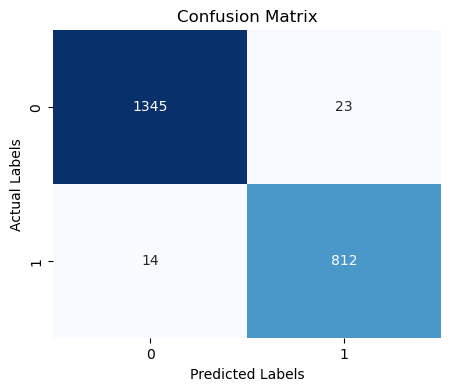

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [50]:
test_scaled = scaler.transform(test)

test_predictions = log_reg.predict(test_scaled)

submission = pd.DataFrame({
    'TransactionNumber': test['TransactionNumber'],
    'IsFraud': test_predictions
})

submission.to_csv('lgsample_submission.csv', index=False)


### RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9986326344576116
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1368
         1.0       1.00      1.00      1.00       826

    accuracy                           1.00      2194
   macro avg       1.00      1.00      1.00      2194
weighted avg       1.00      1.00      1.00      2194



Confusion Matrix:
[[1368    0]
 [   3  823]]


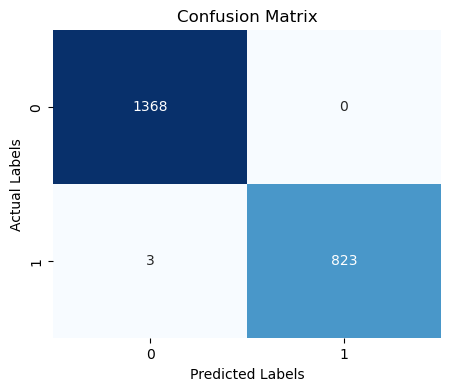

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [53]:
test_scaled = scaler.transform(test)

test_predictions = rf_model.predict(test_scaled)

submission = pd.DataFrame({
    'TransactionNumber': test['TransactionNumber'],
    'IsFraud': test_predictions
})

submission.to_csv('sample_submission.csv', index=False)


### XGBClassifier

In [54]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9995442114858706
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1368
         1.0       1.00      1.00      1.00       826

    accuracy                           1.00      2194
   macro avg       1.00      1.00      1.00      2194
weighted avg       1.00      1.00      1.00      2194



Confusion Matrix:
[[1368    0]
 [   1  825]]


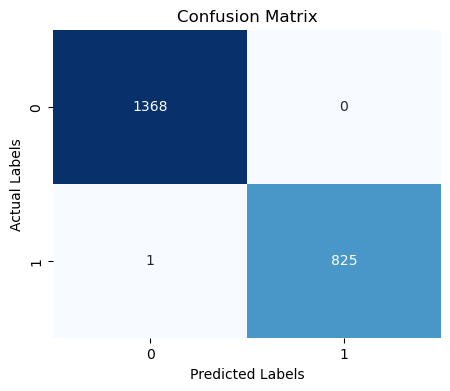

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [56]:
test_scaled = scaler.transform(test)

test_predictions = xgb_model.predict(test_scaled)

submission = pd.DataFrame({
    'TransactionNumber': test['TransactionNumber'],
    'IsFraud': test_predictions
})

submission.to_csv('xgsample_submission.csv', index=False)


### GradientBoostingClassifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbm_model.fit(X_train_scaled, y_train)

y_pred = gbm_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.9995442114858706
Confusion Matrix:
[[1368    0]
 [   1  825]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1368
         1.0       1.00      1.00      1.00       826

    accuracy                           1.00      2194
   macro avg       1.00      1.00      1.00      2194
weighted avg       1.00      1.00      1.00      2194



Confusion Matrix:
[[1368    0]
 [   1  825]]


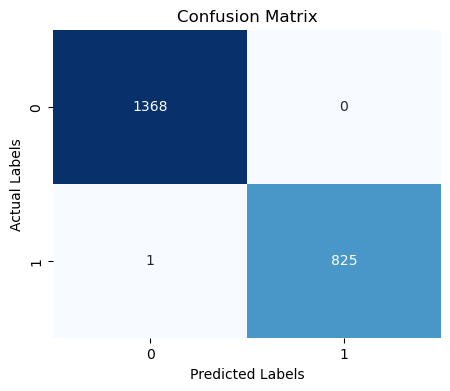

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [60]:
test_scaled = scaler.transform(test)

test_predictions = gbm_model.predict(test_scaled)

submission = pd.DataFrame({
    'TransactionNumber': test['TransactionNumber'],
    'IsFraud': test_predictions
})

submission.to_csv('sample_submission.csv', index=False)


After the extended training and fine-tuning, our model achieved an F1 score of **0.999** on the Kaggle test set.
| Model      | Train set|  Test Set (Kaggle) |
|------------|------------------------|---------------------------|
|Logistic Regression |     0.983         |      0.976         |
| Random Forest   |       0.999        |       0.997          |
| XGBoost    |      0.9995          |         0.998       |
| Gradient Boosting   |         0.9995     |         0.999        |

